<a href="https://colab.research.google.com/github/Ellithyy/calc_app/blob/master/imgenhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


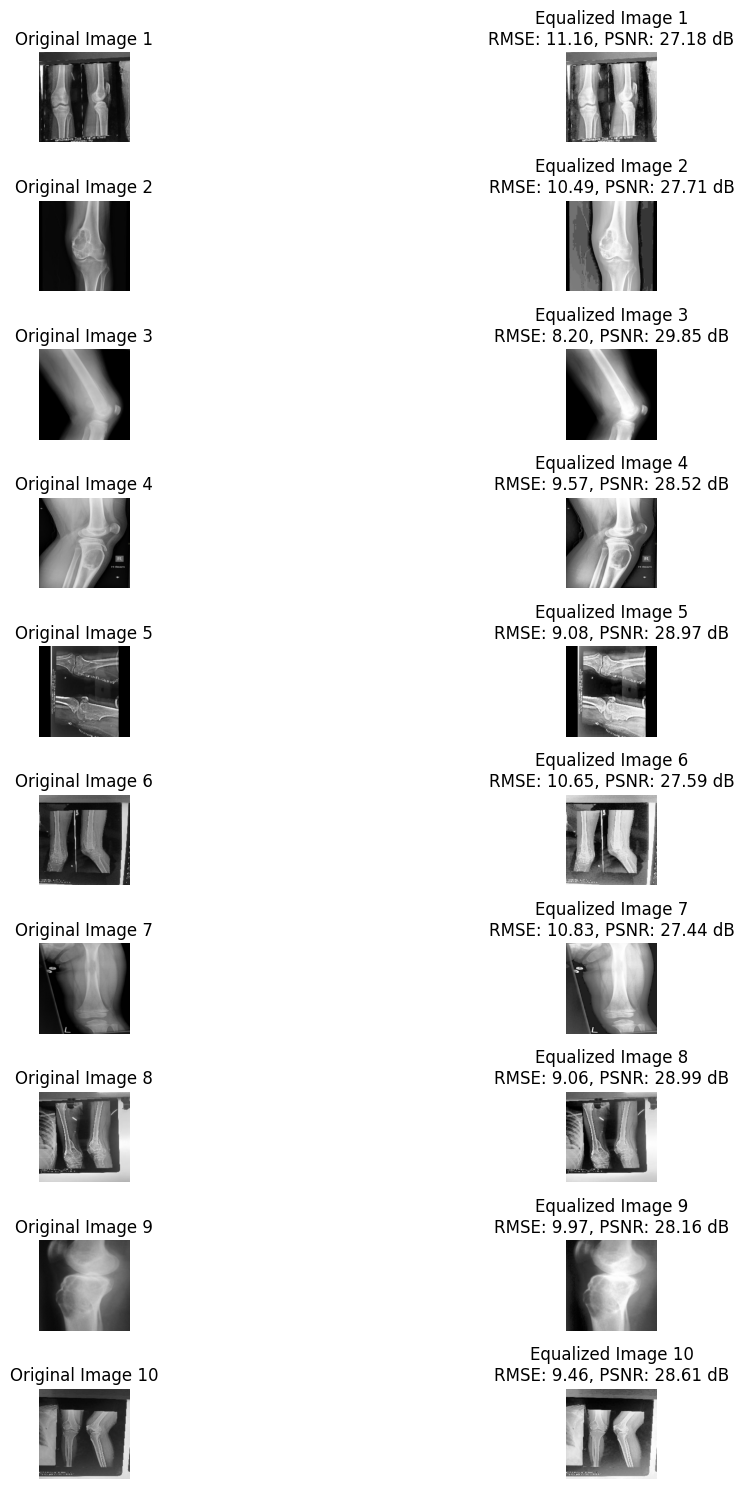

In [17]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply histogram equalization
def histogram_equalization(image):
    if len(image.shape) == 2:  # Grayscale image
        return cv2.equalizeHist(image)
    else:  # Color image (BGR)
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)  # Convert to YCrCb color space
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])  # Apply histogram equalization to the Y channel
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)  # Convert back to BGR

# Function to calculate RMSE
def calculate_rmse(original, processed):
    return np.sqrt(np.mean((original - processed) ** 2))

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Avoid division by zero
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Step 5: Loop through each selected image, apply histogram equalization and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply histogram equalization
    equalized_img = histogram_equalization(img)

    equalized_img_rgb = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB)

    # Calculate RMSE and PSNR
    rmse = calculate_rmse(img, equalized_img)
    psnr = calculate_psnr(img, equalized_img)

    # Plot original image
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Plot equalized image with annotations
    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(equalized_img_rgb)
    plt.title(f"Equalized Image {i+1}\nRMSE: {rmse:.2f}, PSNR: {psnr:.2f} dB")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


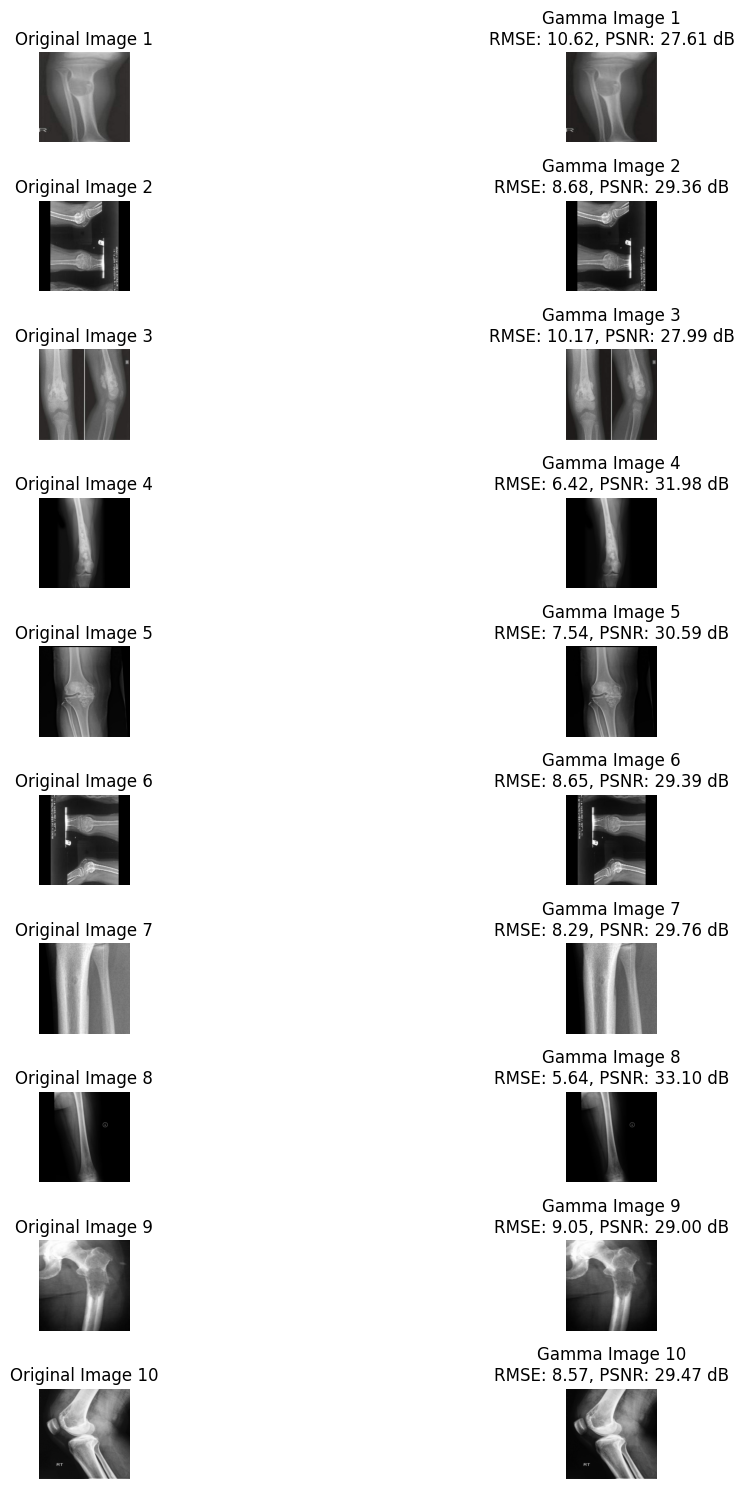

In [18]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply Power-law (Gamma) transformation
def power_law_transformation(image, gamma=1.2, c=1):
    # Normalize image to range [0, 1]
    normalized_image = image / 255.0
    # Apply the power-law transformation
    transformed_image = c * np.power(normalized_image, gamma)
    # Scale back to [0, 255]
    return np.uint8(transformed_image * 255)

# Function to calculate RMSE
def calculate_rmse(original, processed):
    return np.sqrt(np.mean((original - processed) ** 2))

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Avoid division by zero
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Step 5: Loop through each selected image, apply power-law transformation, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply Power-law transformation
    gamma_img = power_law_transformation(img, gamma=1.2)  # Adjust gamma as needed

    gamma_img_rgb = cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB)

    # Calculate RMSE and PSNR
    rmse = calculate_rmse(img, gamma_img)
    psnr = calculate_psnr(img, gamma_img)

    # Plot original image
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Plot gamma-transformed image with annotations
    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(gamma_img_rgb)
    plt.title(f"Gamma Image {i+1}\nRMSE: {rmse:.2f}, PSNR: {psnr:.2f} dB")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


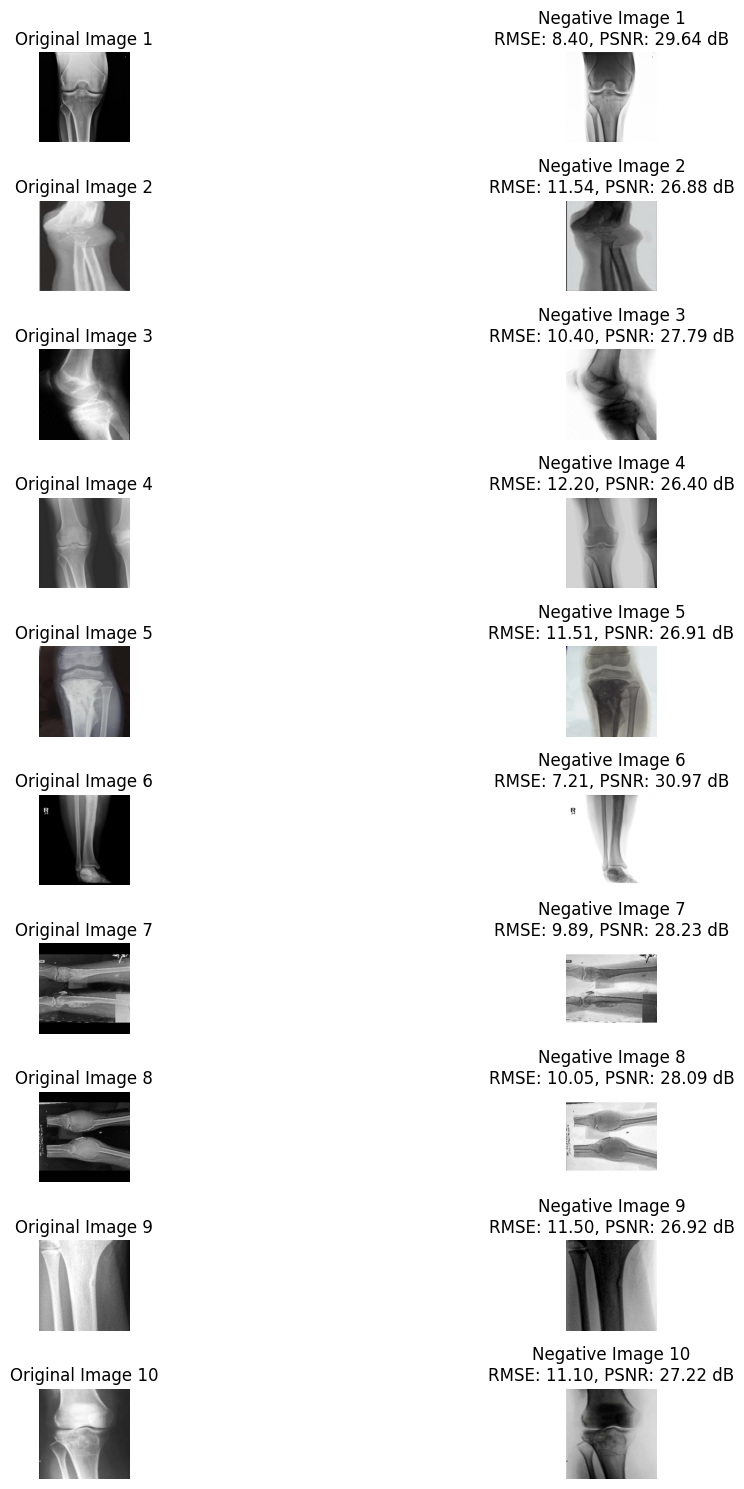

In [19]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply negative transformation
def negative_transformation(image):
    # Invert the image by subtracting pixel values from 255
    return 255 - image

# Function to calculate RMSE
def calculate_rmse(original, processed):
    return np.sqrt(np.mean((original - processed) ** 2))

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Avoid division by zero
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Step 5: Loop through each selected image, apply negative transformation, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply negative transformation
    negative_img = negative_transformation(img)

    # Calculate RMSE and PSNR
    rmse = calculate_rmse(img, negative_img)
    psnr = calculate_psnr(img, negative_img)

    # Convert transformed image to RGB for displaying
    negative_img_rgb = cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB)

    # Plot original image
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Plot negative image with annotations
    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(negative_img_rgb)
    plt.title(f"Negative Image {i+1}\nRMSE: {rmse:.2f}, PSNR: {psnr:.2f} dB")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


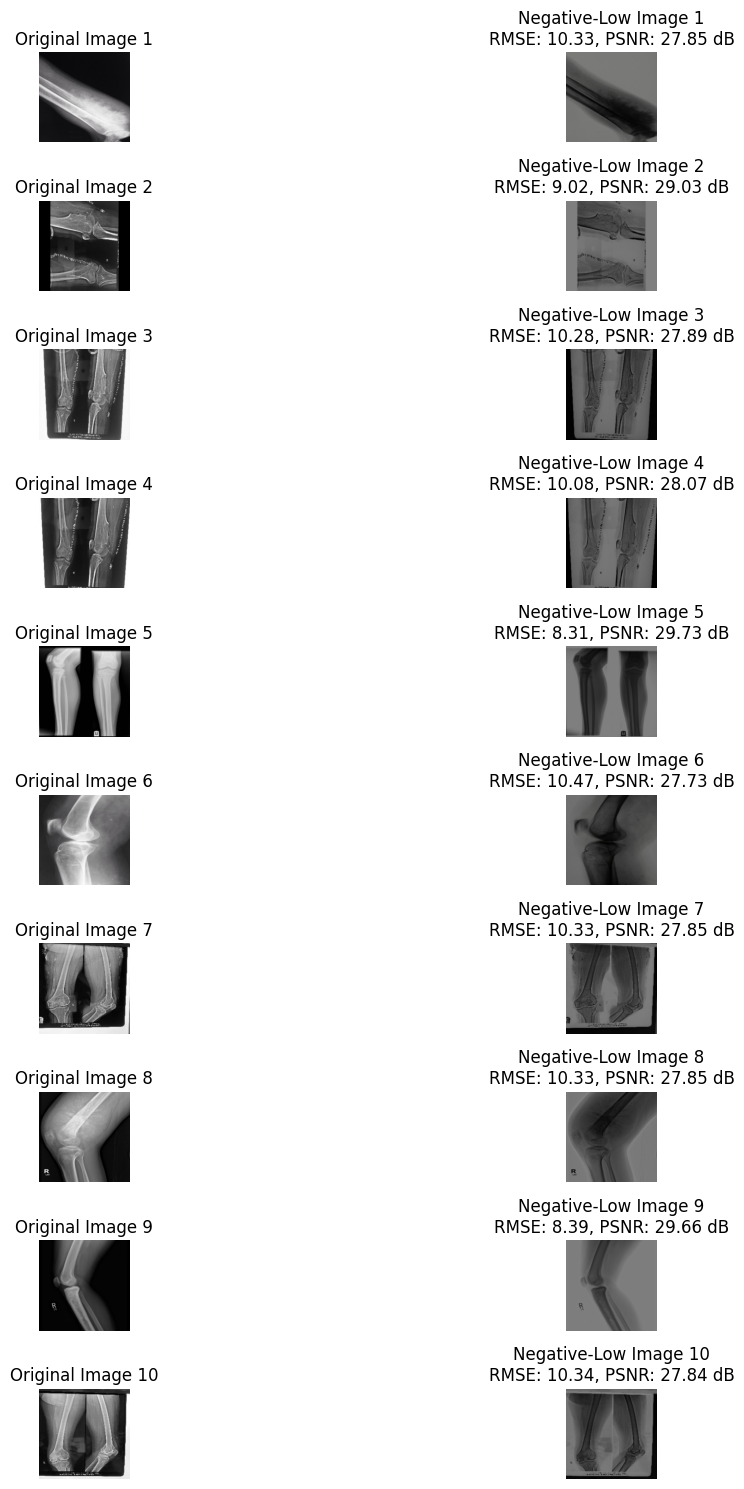

In [20]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply negative-low transformation
def negative_low_transformation(image, intensity_factor=0.5):
    # Apply negative transformation
    negative_image = 255 - image
    # Apply intensity scaling to darken the result
    negative_low_image = np.clip(negative_image * intensity_factor, 0, 255).astype(np.uint8)
    return negative_low_image

# Function to calculate RMSE
def calculate_rmse(original, processed):
    return np.sqrt(np.mean((original - processed) ** 2))

# Function to calculate PSNR
def calculate_psnr(original, processed):
    mse = np.mean((original - processed) ** 2)
    if mse == 0:  # Avoid division by zero
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Step 5: Loop through each selected image, apply negative-low transformation, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply negative-low transformation
    negative_low_img = negative_low_transformation(img, intensity_factor=0.5)  # Adjust intensity factor as needed

    # Calculate RMSE and PSNR
    rmse = calculate_rmse(img, negative_low_img)
    psnr = calculate_psnr(img, negative_low_img)

    # Convert transformed image to RGB for displaying
    negative_low_img_rgb = cv2.cvtColor(negative_low_img, cv2.COLOR_BGR2RGB)

    # Plot original image
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    # Plot negative-low image with annotations
    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(negative_low_img_rgb)
    plt.title(f"Negative-Low Image {i+1}\nRMSE: {rmse:.2f}, PSNR: {psnr:.2f} dB")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


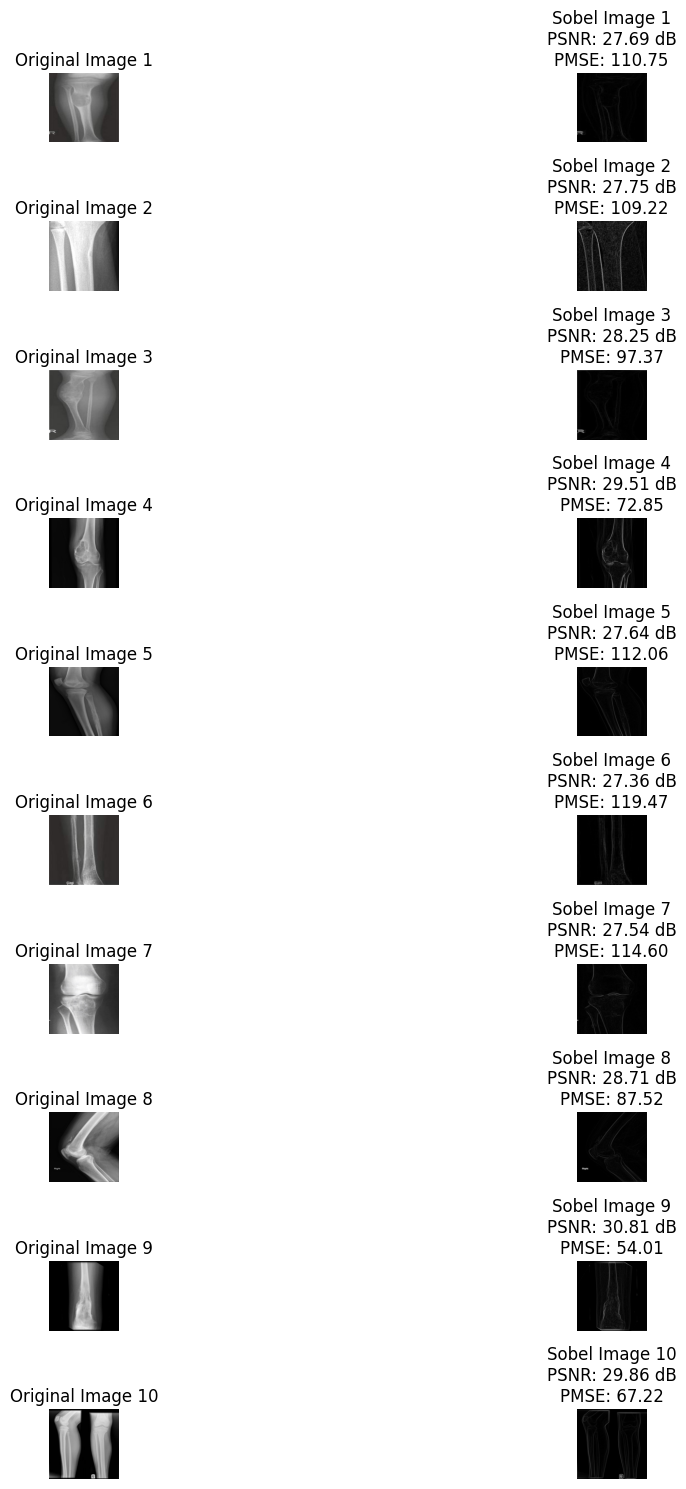

In [5]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply Sobel filter
def apply_sobel(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Sobel filter in both x and y directions
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    # Combine the two gradients
    sobel_image = np.sqrt(sobel_x**2 + sobel_y**2)
    # Normalize the result to [0, 255]
    sobel_image = cv2.normalize(sobel_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return sobel_image

# Function to calculate PSNR
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')  # No noise is present
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate PMSE (Peak Mean Square Error)
def calculate_pmse(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    return mse

# Step 5: Loop through each selected image, apply Sobel filter, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply Sobel filter
    sobel_img = apply_sobel(img)

    # Calculate PSNR and PMSE
    psnr_value = calculate_psnr(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), sobel_img)
    pmse_value = calculate_pmse(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), sobel_img)

    # Plot original and Sobel filtered images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(sobel_img, cmap='gray')
    plt.title(f"Sobel Image {i+1}\nPSNR: {psnr_value:.2f} dB\nPMSE: {pmse_value:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


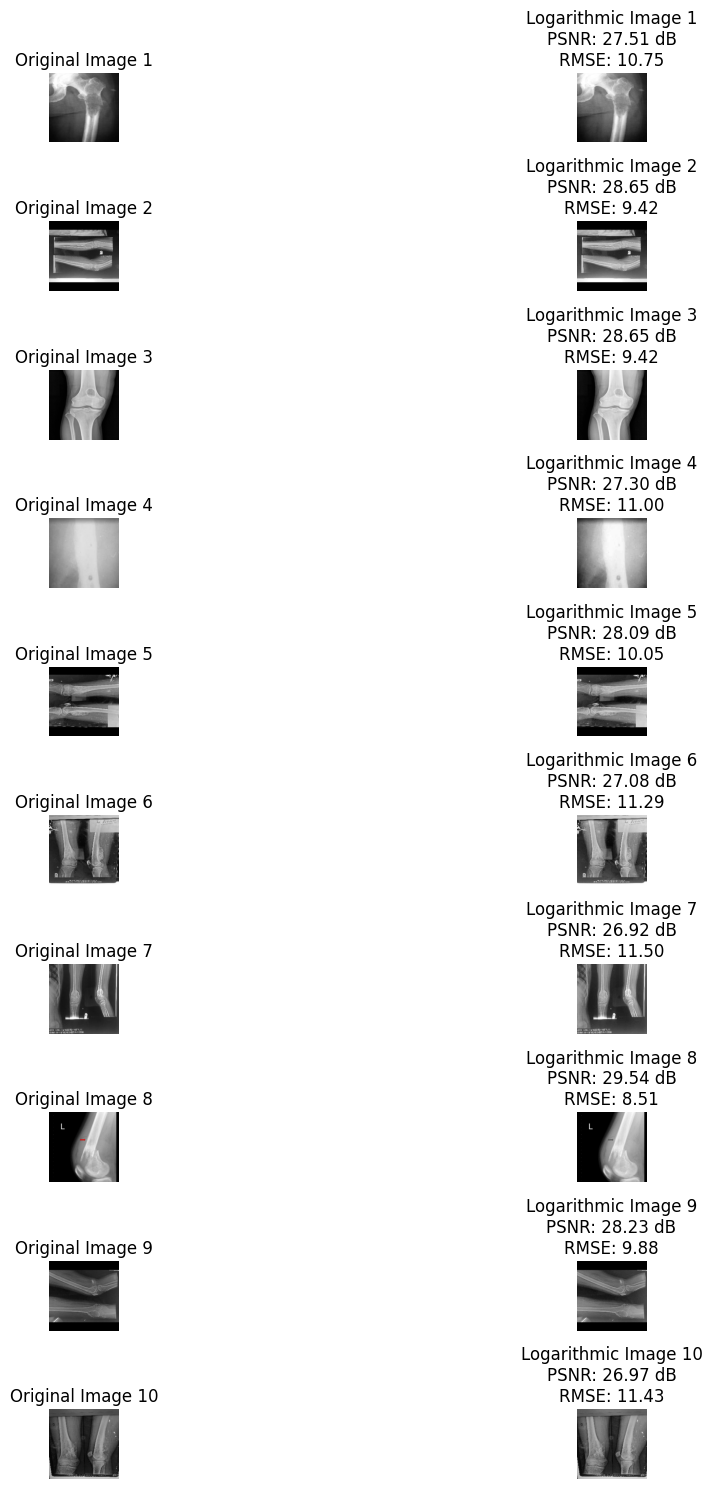

In [6]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply logarithmic filtering
def logarithmic_filtering(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image to the range [0, 1]
    normalized_image = gray_image / 255.0

    # Apply the logarithmic transformation
    log_image = np.log1p(normalized_image)  # Using log1p for numerical stability (log(1 + x))

    # Scale back to [0, 255] and convert to uint8
    log_image = (log_image / np.log(1 + 1) * 255).astype(np.uint8)

    return log_image

# Function to calculate PSNR
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')  # No noise is present
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate RMSE
def calculate_rmse(original, filtered):
    return np.sqrt(np.mean((original - filtered) ** 2))

# Step 5: Loop through each selected image, apply logarithmic filtering, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply logarithmic filtering
    log_img = logarithmic_filtering(img)

    # Calculate PSNR and RMSE
    psnr_value = calculate_psnr(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), log_img)
    rmse_value = calculate_rmse(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), log_img)

    # Plot original and logarithmically filtered images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(log_img, cmap='gray')
    plt.title(f"Logarithmic Image {i+1}\nPSNR: {psnr_value:.2f} dB\nRMSE: {rmse_value:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


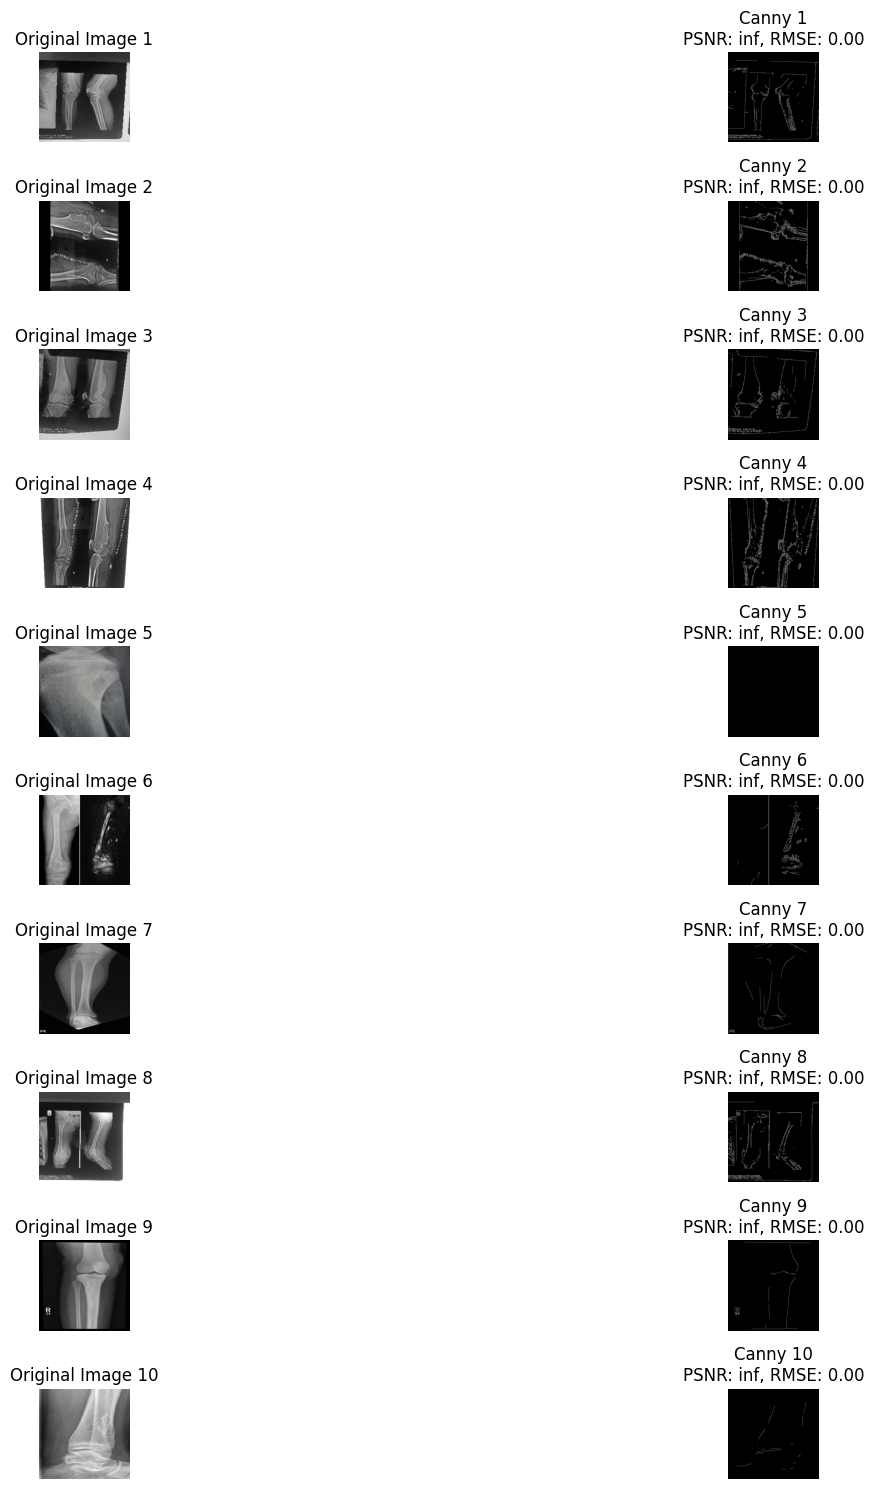

In [13]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to perform Canny edge detection
def canny_edge_detection(image, threshold1=100, threshold2=200):
    if len(image.shape) == 3:  # Convert color image to grayscale for edge detection
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image  # If already grayscale
    return cv2.Canny(gray_image, threshold1, threshold2)

# Function to perform bit plane slicing
def bit_plane_slicing(image, bit_plane=7):
    if len(image.shape) == 3:  # Convert color image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image  # If already grayscale
    bit_plane_image = (gray_image >> bit_plane) & 1  # Extract the desired bit plane
    return (bit_plane_image * 255).astype(np.uint8)  # Scale to 0-255 for visualization

# Function to calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:  # Perfect reconstruction
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate RMSE
def calculate_rmse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    return np.sqrt(mse)

# Step 5: Loop through each selected image, apply Canny edge detection, bit plane slicing, and display results
plt.figure(figsize=(20, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply Canny edge detection
    edges = canny_edge_detection(img)

    # Perform bit plane slicing on the edge-detected image (e.g., on the 7th bit plane)
    bit_plane_image = bit_plane_slicing(edges)

    # Reconstruct the image from the selected bit plane
    reconstructed_image = (bit_plane_image > 0).astype(np.uint8) * 255

    # Calculate PSNR and RMSE
    psnr = calculate_psnr(edges, reconstructed_image)
    rmse = calculate_rmse(edges, reconstructed_image)

    # Plot original and edge-detected images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(bit_plane_image, cmap='gray')
    plt.title(f"Canny {i+1}\nPSNR: {psnr:.2f}, RMSE: {rmse:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


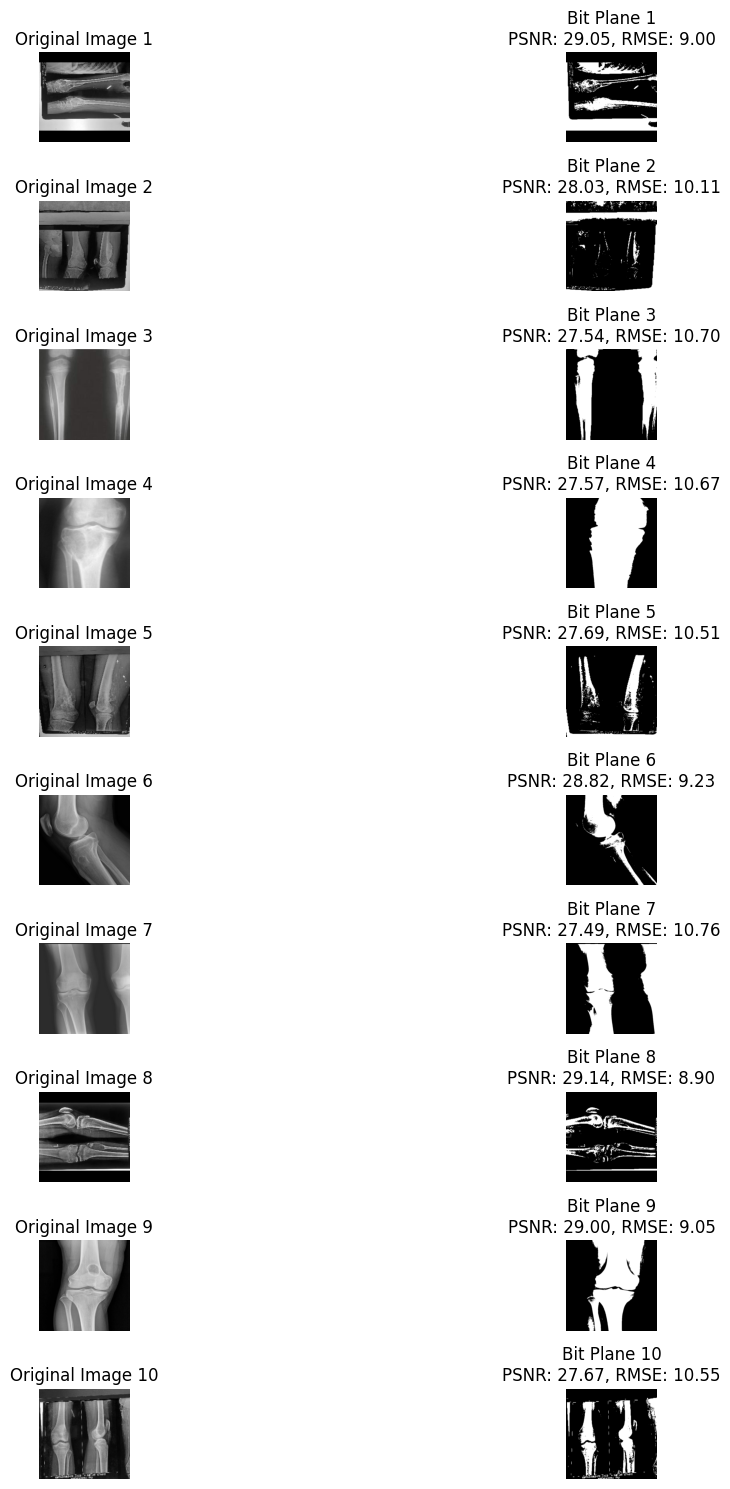

In [10]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to perform bit plane slicing
def bit_plane_slicing(image, bit_plane=7):
    if len(image.shape) == 3:  # Convert color image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image  # If already grayscale
    bit_plane_image = (gray_image >> bit_plane) & 1  # Extract the desired bit plane
    return (bit_plane_image * 255).astype(np.uint8)  # Scale to 0-255 for visualization

# Function to calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:  # Perfect reconstruction
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate RMSE
def calculate_rmse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    return np.sqrt(mse)

# Step 5: Loop through each selected image, apply bit plane slicing, reconstruct, and display results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform bit plane slicing (e.g., on the 7th bit plane)
    bit_plane_image = bit_plane_slicing(img)

    # Reconstruct the image from the selected bit plane
    reconstructed_image = (bit_plane_image > 0).astype(np.uint8) * 255

    # Calculate PSNR and RMSE
    psnr = calculate_psnr(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), reconstructed_image)
    rmse = calculate_rmse(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), reconstructed_image)

    # Plot original and bit plane images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(bit_plane_image, cmap='gray')
    plt.title(f"Bit Plane {i+1}\nPSNR: {psnr:.2f}, RMSE: {rmse:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


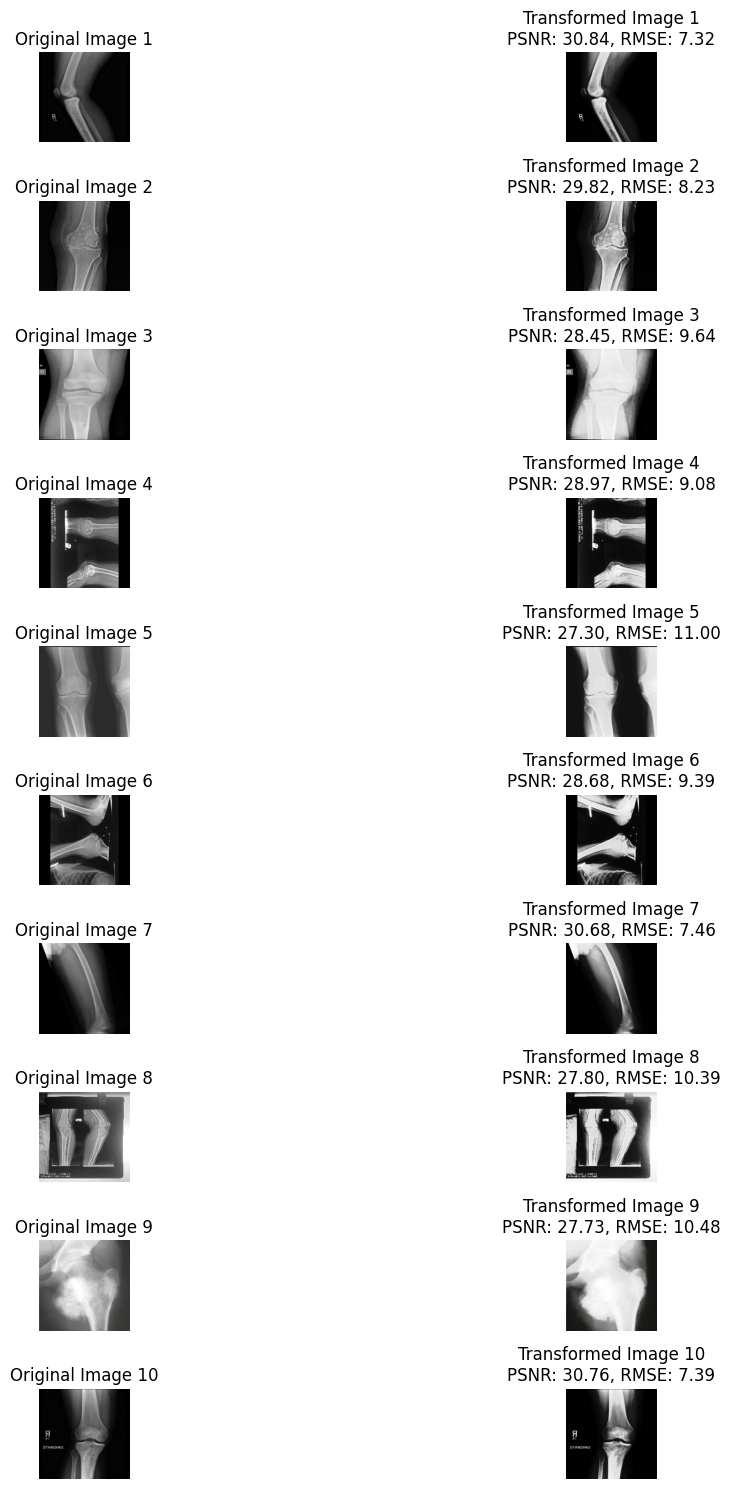

In [14]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob
from sklearn.metrics import mean_squared_error

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # Adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function for Piecewise Linear Transformation
def piecewise_linear_transformation(image):
    # Define piecewise linear transformation points
    # Mapping (0, 0), (a, b), (c, d), (255, 255)
    a, b = 70, 30   # First linear segment control points
    c, d = 140, 220 # Second linear segment control points

    # Create a lookup table for pixel intensity transformation
    lookup_table = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        if i < a:
            lookup_table[i] = (b / a) * i
        elif a <= i <= c:
            lookup_table[i] = ((d - b) / (c - a)) * (i - a) + b
        else:
            lookup_table[i] = ((255 - d) / (255 - c)) * (i - c) + d

    # Apply the transformation using the lookup table
    transformed_img = cv2.LUT(image, lookup_table)
    return transformed_img

# Function to calculate PSNR
def calculate_psnr(original, transformed):
    mse = np.mean((original - transformed) ** 2)
    if mse == 0:  # If MSE is zero, PSNR is infinite
        return float('inf')
    psnr = 20 * np.log10(255.0 / np.sqrt(mse))
    return psnr

# Function to calculate RMSE
def calculate_rmse(original, transformed):
    return np.sqrt(mean_squared_error(original.flatten(), transformed.flatten()))

# Step 5: Loop through each selected image, apply piecewise linear transformation, and display the results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply piecewise linear transformation
    transformed_img = piecewise_linear_transformation(img)

    # Convert transformed image from BGR to RGB
    transformed_img_rgb = cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB)

    # Calculate PSNR and RMSE
    psnr_value = calculate_psnr(img, transformed_img)
    rmse_value = calculate_rmse(img, transformed_img)

    # Plot original and transformed images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(transformed_img_rgb)
    plt.title(f"Transformed Image {i+1}\nPSNR: {psnr_value:.2f}, RMSE: {rmse_value:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Selected 10 images for processing.


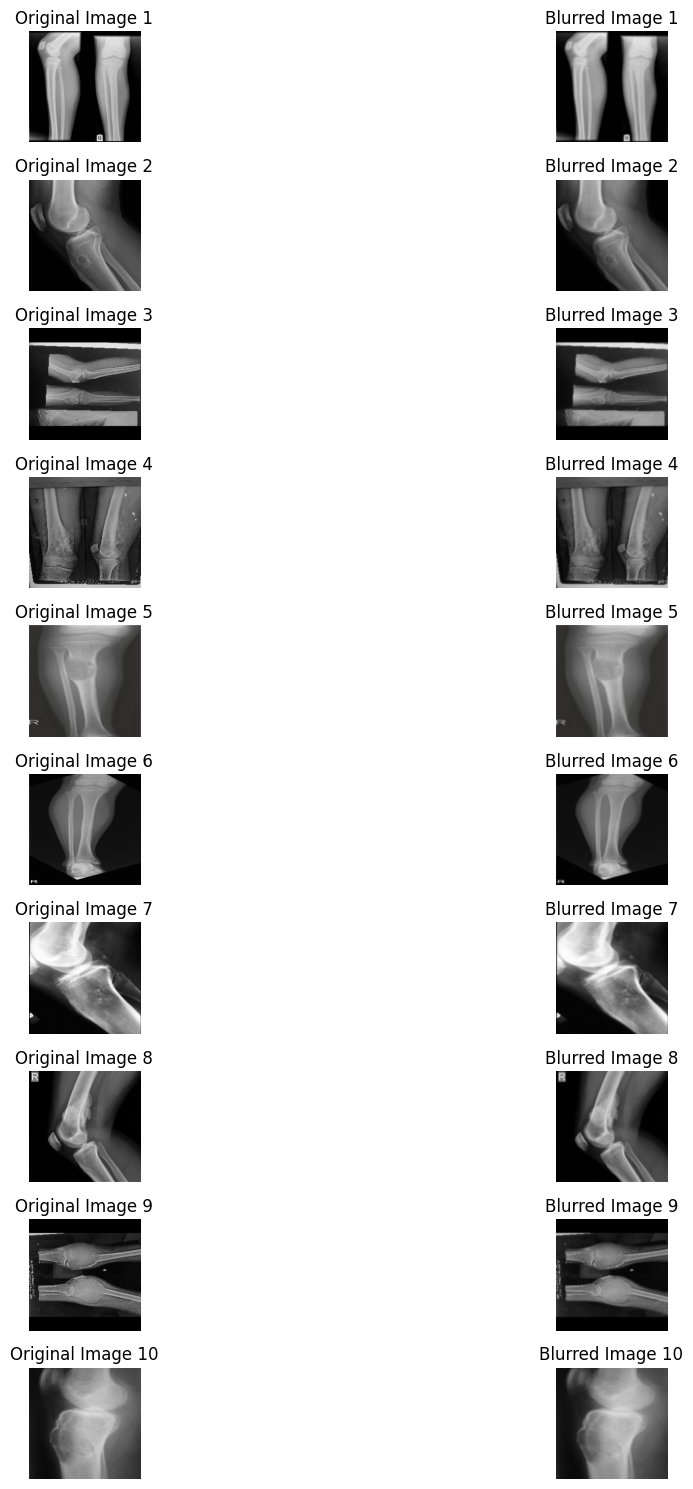

In [15]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # Adjust the file extension if necessary

# Check how many images are available
num_images = len(image_paths)
if num_images == 0:
    raise ValueError("No images found in the specified folder.")

# Step 4: Randomly select up to 10 images from the folder
sample_size = min(10, num_images)  # Adjust sample size to available images
selected_images = random.sample(image_paths, sample_size)

print(f"Selected {sample_size} images for processing.")

# Function to apply Gaussian blur
def apply_gaussian_blur(image, kernel_size=15):
    # Apply Gaussian blur with a smaller kernel size (default is 15x15)
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Step 5: Loop through each selected image, apply Gaussian blur, and display the results
plt.figure(figsize=(15, 15))

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply Gaussian blur
    blurred_img = apply_gaussian_blur(img)

    blurred_img_rgb = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

    # Plot original and blurred images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(blurred_img_rgb)
    plt.title(f"Blurred Image {i+1}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


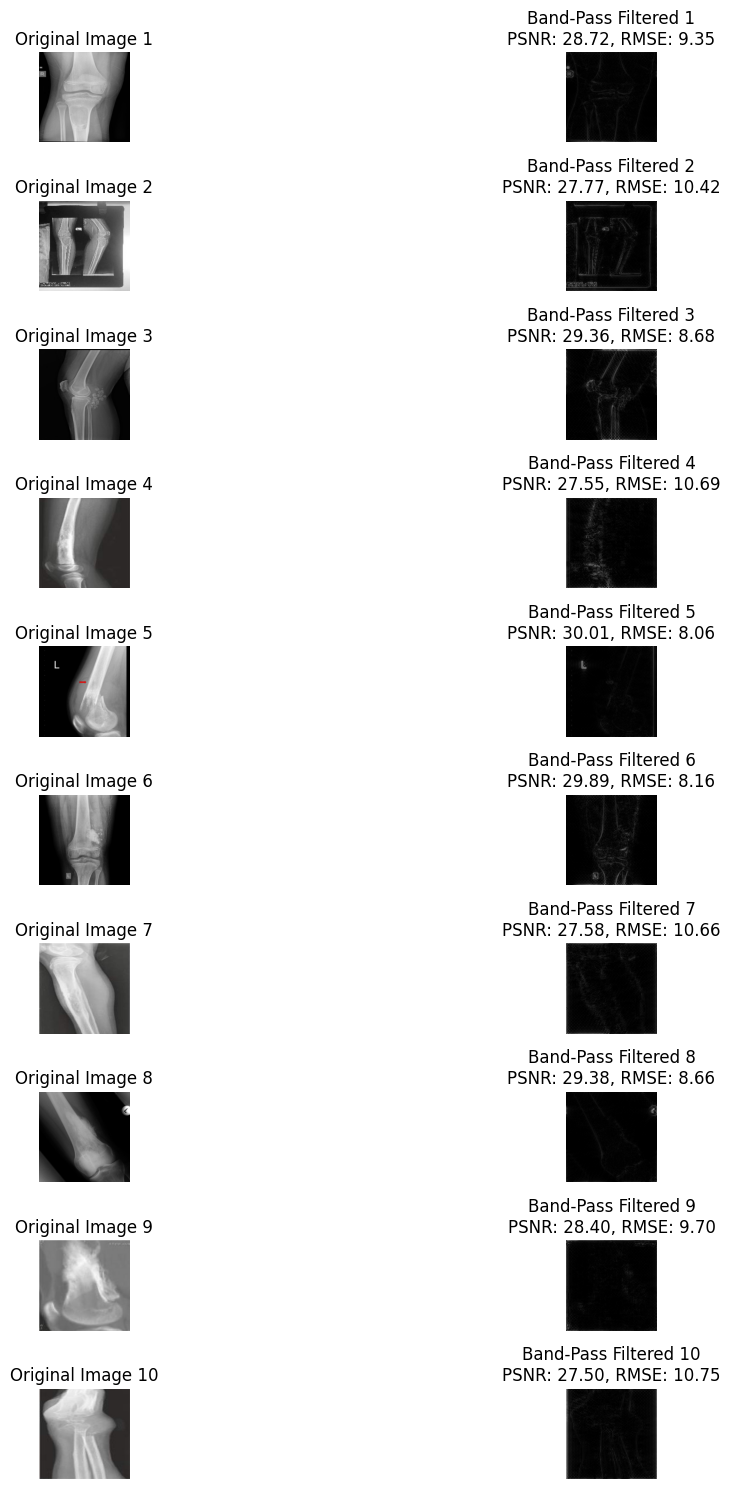

In [21]:
# Import necessary libraries
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from google.colab import drive
import glob

# Step 1: Mount Google Drive (if your images are in Google Drive)
drive.mount('/content/drive')

# Step 2: Set the folder path where your images are stored
image_folder = '/content/drive/MyDrive/bonetest'  # Change this path to your image folder

# Step 3: Get a list of all image file paths from the folder
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))  # You can adjust the file extension if necessary

# Step 4: Randomly select 10 images from the folder
selected_images = random.sample(image_paths, 10)

# Function to apply band-pass filtering
def band_pass_filter(image, low_freq=30, high_freq=120):
    if len(image.shape) == 3:  # Convert color image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Perform FFT
    dft = np.fft.fft2(gray_image)
    dft_shift = np.fft.fftshift(dft)

    # Create a band-pass mask
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), dtype=np.uint8)
    cv2.circle(mask, (ccol, crow), high_freq, 1, thickness=-1)
    cv2.circle(mask, (ccol, crow), low_freq, 0, thickness=-1)

    # Apply the mask
    filtered_dft_shift = dft_shift * mask

    # Perform inverse FFT
    dft_ishift = np.fft.ifftshift(filtered_dft_shift)
    filtered_image = np.abs(np.fft.ifft2(dft_ishift))
    return filtered_image.astype(np.uint8)

# Function to calculate PSNR
def calculate_psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:  # Perfect reconstruction
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Function to calculate RMSE
def calculate_rmse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    return np.sqrt(mse)

# Step 5: Loop through each selected image, apply band-pass filter, and display results
plt.figure(figsize=(15, 15))

sample_size = len(selected_images)

for i, image_path in enumerate(selected_images):
    # Read the image
    img = cv2.imread(image_path)

    # Convert from BGR (OpenCV default) to RGB for displaying in Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply band-pass filtering
    filtered_image = band_pass_filter(img)

    # Calculate PSNR and RMSE
    psnr = calculate_psnr(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), filtered_image)
    rmse = calculate_rmse(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), filtered_image)

    # Plot original and band-pass filtered images
    plt.subplot(sample_size, 2, 2 * i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

    plt.subplot(sample_size, 2, 2 * i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Band-Pass Filtered {i+1}\nPSNR: {psnr:.2f}, RMSE: {rmse:.2f}")
    plt.axis('off')

# Display the results
plt.tight_layout()
plt.show()